In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
from scipy import signal

In [2]:
df = pd.read_csv("../data/imbalance_1h_2019.csv")

In [11]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [15]:
df = df.set_index('timestamp')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20424 entries, 2019-01-01 00:00:00 to 2021-04-30 23:00:00
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   imbalance_price  20424 non-null  float64
dtypes: float64(1)
memory usage: 319.1 KB


In [19]:
df.describe()

,imbalance_price
count,20424.000000
mean,43.167652
std,461.044752
min,-2425.373000
25%,-234.543500
50%,31.174250
75%,303.135750
max,3571.220500


Text(0, 0.5, 'Imbalance Price')

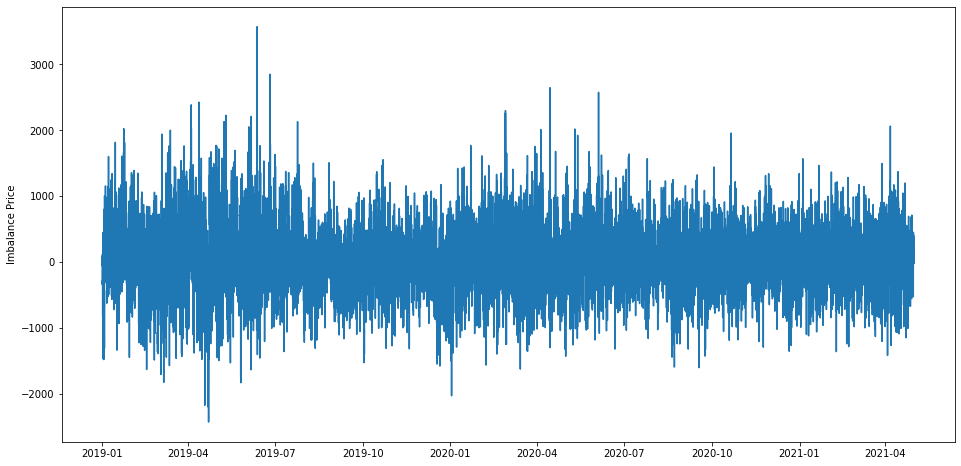

In [17]:
plt.figure(figsize=(16,8))
plt.plot(df['imbalance_price'])
plt.ylabel('Imbalance Price')

In [20]:
# Define plotting parameters and custom color palette 
cmaps_hex = ['#193251','#FF5A36','#1E4485', '#99D04A','#FF5A36', '#DB6668']
#sns.set_palette(palette=cmaps_hex)
sns_c = sns.color_palette(palette=cmaps_hex)

plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['figure.dpi'] = 100

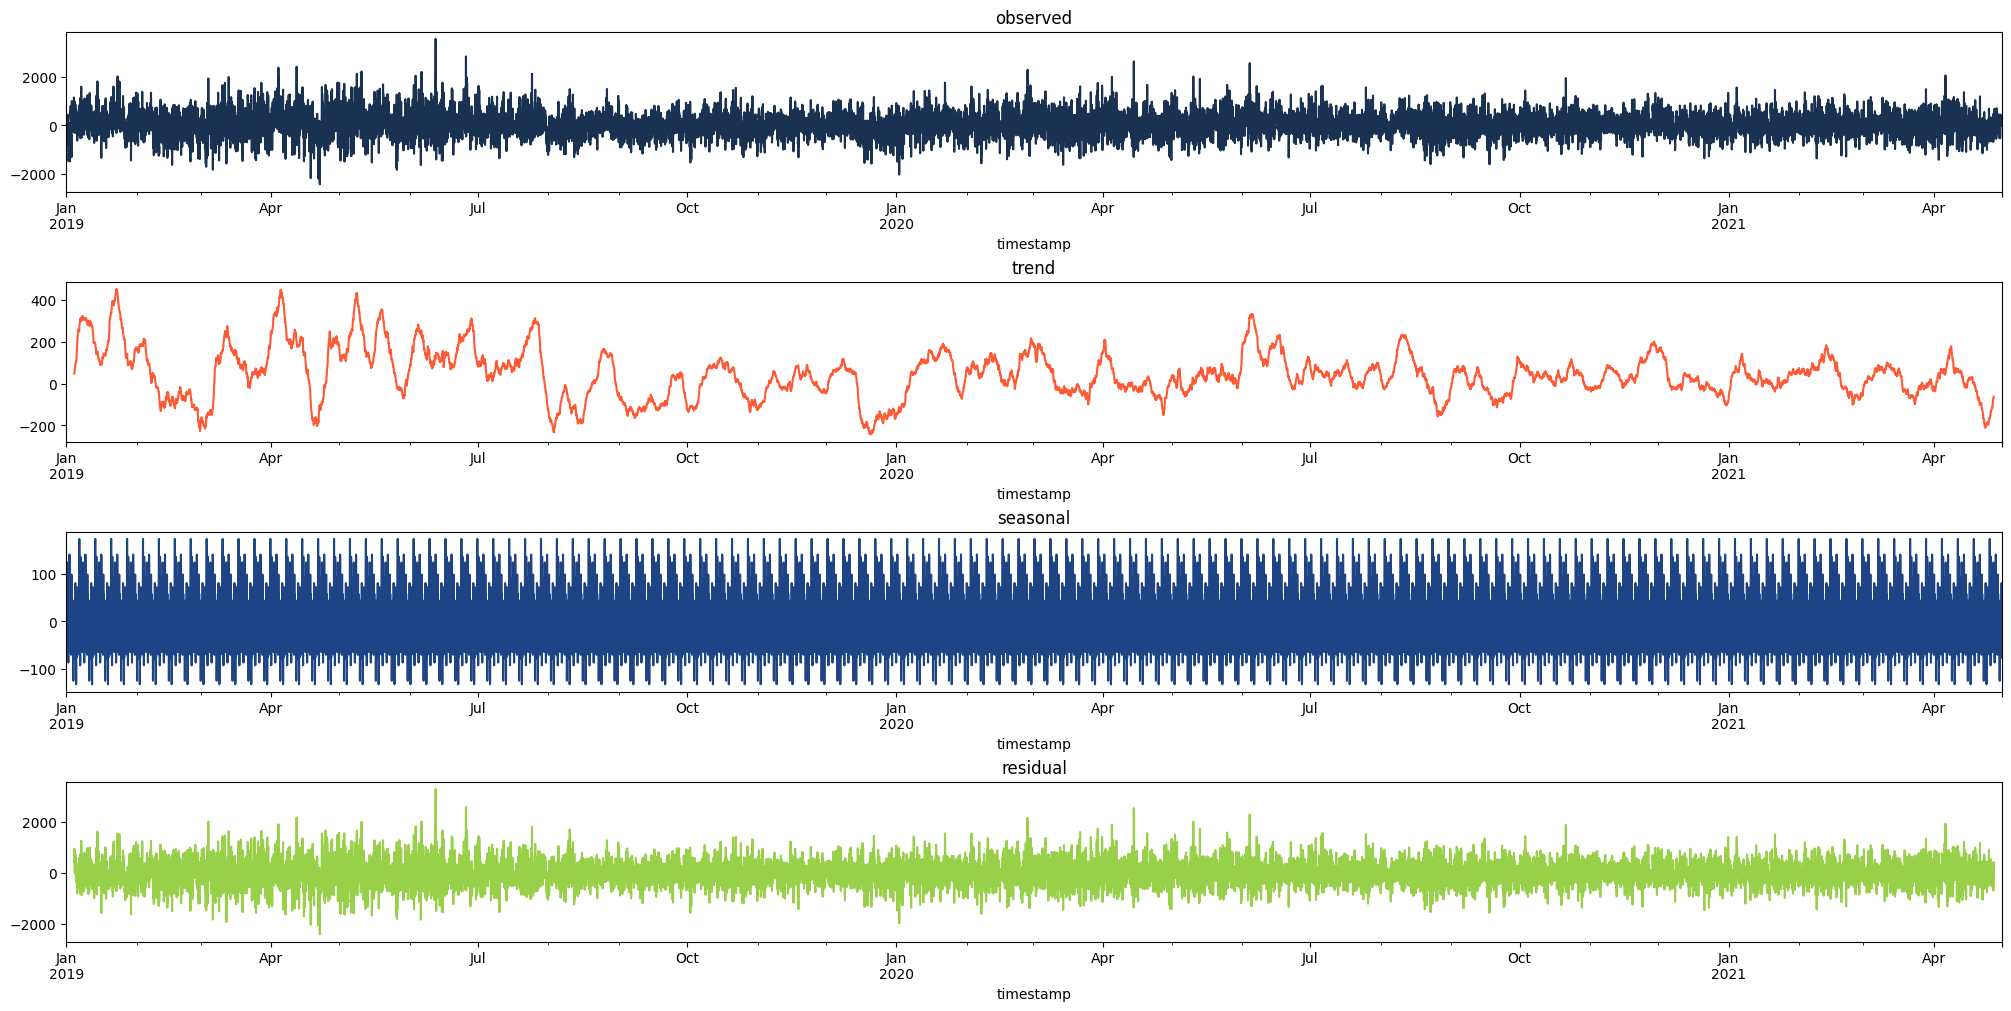

In [21]:
# Check decomposition of trend, seasonality and residue of original time series
decomposition = seasonal_decompose(x=df['imbalance_price'], 
                                   model='additive',
                                   period=168)


fig, ax = plt.subplots(4, 1, figsize=(12, 12), constrained_layout=True)
decomposition.observed.plot(c=sns_c[0], ax=ax[0])
ax[0].set(title='observed')
decomposition.trend.plot(c=sns_c[1], ax=ax[1])
ax[1].set(title='trend')
decomposition.seasonal.plot(c=sns_c[2], ax=ax[2])
ax[2].set(title='seasonal')
decomposition.resid.plot(c=sns_c[3], ax=ax[3])
ax[3].set(title='residual')
fig.set_size_inches(20, 10);